In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt
import os
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.colors as mcolors
from matplotlib.patches import FancyBboxPatch
import matplotlib.patches as mpatches
import matplotlib.lines as mlines


In [2]:
# Setting plotting parameters
plt.rcParams["font.family"] = 'Times New Roman'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1 
plt.rcParams["xtick.direction"] = "out"
plt.rcParams["ytick.direction"] = "out"
plt.rcParams["ytick.direction"] = "out"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 6 # Sets length of ticks
plt.rcParams["xtick.minor.size"] = 3 # Sets length of ticks
plt.rcParams["ytick.minor.size"] = 3 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels
plt.rcParams["pdf.fonttype"]=42
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams["legend.fancybox"]=False

In [3]:
if os.name=='posix':
    slash='/'
else:
    slash='\\'

MasterFolder=os.getcwd()

# rep_FI_path=os.path.join(Helperfile_folder, "Leilani_repeated_names.xlsx") #r"P:\WORK-GENERAL\POSTDOC-UCB\BERKELEY-VIBE\Documents\Projects\Data\Hawaii_FI\Data\Helper_files\Leilaini_repeated_names.xlsx"

#Folder to save figures

figpath=MasterFolder +slash+'Figs'
if not os.path.exists(figpath):
    os.mkdir(figpath)

#Folder to save full datasets

compilation_folder=MasterFolder +slash+'Compiled_data'
if not os.path.exists(compilation_folder):
    os.mkdir(compilation_folder)

In [4]:
crystals=pd.read_excel(compilation_folder+'/'+"KAM_crystals_averagedbycrystal.xlsx")
crystals = crystals.loc[:, ~crystals.columns.str.contains('^Unnamed')]
crystals = crystals[~crystals['Sample'].str.contains("AMG")]
crystals

,Sample,Total (wt%),Sample_crystal,Inclusion type,Predict_Mineral,Al2O3,CaO,Cr2O3,FeOt,MgO,...,"Al2O3_wt%uncertainty (Al2O3_crystal_std when it was averaged by crystal, Al2O3_Oxide sigma% when it was a single spot)","CaO_wt%uncertainty (CaO_crystal_std when it was averaged by crystal, CaO_Oxide sigma% when it was a single spot)","Cr2O3_wt%uncertainty (Cr2O3_crystal_std when it was averaged by crystal, Cr2O3_Oxide sigma% when it was a single spot)","FeOt_wt%uncertainty (FeOt_crystal_std when it was averaged by crystal, FeOt_Oxide sigma% when it was a single spot)","MgO_wt%uncertainty (MgO_crystal_std when it was averaged by crystal, MgO_Oxide sigma% when it was a single spot)","MnO_wt%uncertainty (MnO_crystal_std when it was averaged by crystal, MnO_Oxide sigma% when it was a single spot)","Na2O_wt%uncertainty (Na2O_crystal_std when it was averaged by crystal, Na2O_Oxide sigma% when it was a single spot)","NiO_wt%uncertainty (NiO_crystal_std when it was averaged by crystal, NiO_Oxide sigma% when it was a single spot)","SiO2_wt%uncertainty (SiO2_crystal_std when it was averaged by crystal, SiO2_Oxide sigma% when it was a single spot)","TiO2_wt%uncertainty (TiO2_crystal_std when it was averaged by crystal, TiO2_Oxide sigma% when it was a single spot)"
3,KA611,50.344650,KA611_c101,FI,Olivine,NaN,0.192525,0.023625,6.852700,22.955875,...,NaN,0.007884,0.009369,0.090863,1.234220,0.008450,NaN,0.005869,1.024315,NaN
4,KA611,99.004200,KA611_c102,FI,Olivine,NaN,0.450100,0.044900,13.202300,45.295100,...,NaN,0.011200,0.014600,0.041900,0.056900,0.015700,NaN,0.020600,0.062600,NaN
5,KA611,99.467500,KA611_c103,FI,Olivine,NaN,0.422200,0.022800,13.362500,45.372400,...,NaN,0.011100,0.014600,0.042100,0.057000,0.015700,NaN,0.020500,0.062700,NaN
6,KA611,99.919700,KA611_c104,FI,Olivine,NaN,0.442000,0.042000,13.267000,45.730800,...,NaN,0.011200,0.014600,0.042000,0.057200,0.015800,NaN,0.020600,0.062900,NaN
7,KA611,98.933100,KA611_c105,FI,Olivine,NaN,0.413300,0.052500,13.347900,45.186500,...,NaN,0.011100,0.014600,0.042000,0.056900,0.015800,NaN,0.020700,0.062500,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,KA79,100.366600,KA79_c502,FI,Olivine,NaN,0.255000,0.113500,10.915200,48.030500,...,NaN,0.012300,0.017200,0.045000,0.066800,0.018100,NaN,0.024300,0.073500,NaN
259,KA79,100.442167,KA79_c503,FI,Olivine,NaN,0.305933,0.072700,13.349533,46.087300,...,NaN,0.000289,NaN,0.588434,0.371135,0.018032,NaN,0.014068,0.029251,NaN
260,KA79,100.110800,KA79_c504,FI,Olivine,NaN,0.247400,0.085400,11.131000,47.738100,...,NaN,0.012400,0.017200,0.045300,0.066700,0.018000,NaN,0.024300,0.073300,NaN
261,KA79,100.421700,KA79_c505,FI,Olivine,NaN,0.250200,0.114100,10.919600,48.074100,...,NaN,0.012300,0.017400,0.045000,0.066800,0.017900,NaN,0.024200,0.073500,NaN


In [5]:
EDS_matglass=pd.read_excel(compilation_folder+'/'+"KAM_matgl_averaged_averaged_sample.xlsx",sheet_name="Sheet1")

EDS_matglass = EDS_matglass.loc[:, ~EDS_matglass.columns.str.contains('^Unnamed')]
EDS_matglass = EDS_matglass[~EDS_matglass['Sample'].str.contains("AMG")]

EDS_matglass.columns = [col + '_matgl' for col in EDS_matglass.columns] 

display(EDS_matglass)
Garcia_glasses=pd.read_excel(r"1995MOG_EastFlank.xlsx",sheet_name="Garcia_glasses")

Garcia_glasses.rename(columns={'Sample': 'Sample_old', 'Type': 'Rock type'}, inplace=True)

def create_new_sample(sample_str):
    parts = sample_str.split('-')
    new_sample = f"KA{parts[0][-1]}{parts[1]}"
    return new_sample

Garcia_glasses['Sample'] = Garcia_glasses['Sample_old'].apply(create_new_sample)
Garcia_glasses.insert(0,'Sample',Garcia_glasses.pop("Sample"))

Garcia_glasses.columns = [col + '_garciagl' for col in Garcia_glasses.columns] 

Garcia_glasses.head()

crystals_wglEDS=pd.merge(left=crystals,left_on='Sample',right=EDS_matglass,right_on='Sample_matgl',how='left',suffixes=(None,"_matgl"))
crystals_wglasses=pd.merge(left=crystals_wglEDS,left_on='Sample',right=Garcia_glasses,right_on='Sample_garciagl',how='left',suffixes=(None,"_garciagl"))
crystals_wglasses=crystals_wglasses.dropna(axis=1, how='all')
crystals_wglasses

,Sample_matgl,Total (wt%)_matgl,Al2O3_matgl,CaO_matgl,Cr2O3_matgl,FeOt_matgl,K2O_matgl,MgO_matgl,MnO_matgl,Na2O_matgl,...,"Cr2O3_wt%uncertainty (Cr2O3_sample_std when it was averaged, Cr2O3_Oxide sigma% when it was a single spot)_matgl","FeOt_wt%uncertainty (FeOt_sample_std when it was averaged, FeOt_Oxide sigma% when it was a single spot)_matgl","K2O_wt%uncertainty (K2O_sample_std when it was averaged, K2O_Oxide sigma% when it was a single spot)_matgl","MgO_wt%uncertainty (MgO_sample_std when it was averaged, MgO_Oxide sigma% when it was a single spot)_matgl","MnO_wt%uncertainty (MnO_sample_std when it was averaged, MnO_Oxide sigma% when it was a single spot)_matgl","Na2O_wt%uncertainty (Na2O_sample_std when it was averaged, Na2O_Oxide sigma% when it was a single spot)_matgl","P2O5_wt%uncertainty (P2O5_sample_std when it was averaged, P2O5_Oxide sigma% when it was a single spot)_matgl","SO3_wt%uncertainty (SO3_sample_std when it was averaged, SO3_Oxide sigma% when it was a single spot)_matgl","SiO2_wt%uncertainty (SiO2_sample_std when it was averaged, SiO2_Oxide sigma% when it was a single spot)_matgl","TiO2_wt%uncertainty (TiO2_sample_std when it was averaged, TiO2_Oxide sigma% when it was a single spot)_matgl"
0,KA611,98.425800,13.798000,13.642600,0.064100,11.363800,0.737600,6.798500,0.197200,2.781500,...,0.021700,0.056000,0.014900,0.039200,0.022800,0.033300,0.026500,0.024200,0.090000,0.030600
1,KA69,98.550788,13.761460,12.292329,0.039192,11.503876,0.518029,7.116926,0.192621,2.431760,...,0.002487,0.124692,0.012610,0.052745,0.010611,0.023635,0.018875,0.026379,0.297720,0.030917
2,KA71,98.305960,12.277140,12.747644,0.097735,11.607199,0.664968,9.399139,0.183107,2.285132,...,0.014994,0.041386,0.007849,0.089156,0.012150,0.033502,0.015880,0.014329,0.256646,0.019322
3,KA78,99.318168,13.759987,11.526950,0.060580,11.275488,0.439700,7.257138,0.177638,2.384425,...,0.023366,0.044097,0.008109,0.056254,0.023371,0.027736,0.016670,0.022867,0.209191,0.012858


,Sample,Total (wt%),Sample_crystal,Inclusion type,Predict_Mineral,Al2O3,CaO,Cr2O3,FeOt,MgO,...,Matrix_garciagl,Ol_garciagl,Ol mu_garciagl,Opaq_garciagl,Plag_garciagl,Plag mu_garciagl,Cpx_garciagl,Cpxji_garciagl,Ves_garciagl,SUMphens_garciagl
0,KA611,50.344650,KA611_c101,FI,Olivine,NaN,0.192525,0.023625,6.852700,22.955875,...,75.5,23.1,0.8,0.1,—,—,<0.1,0.5,13.9,23.1
1,KA611,99.004200,KA611_c102,FI,Olivine,NaN,0.450100,0.044900,13.202300,45.295100,...,75.5,23.1,0.8,0.1,—,—,<0.1,0.5,13.9,23.1
2,KA611,99.467500,KA611_c103,FI,Olivine,NaN,0.422200,0.022800,13.362500,45.372400,...,75.5,23.1,0.8,0.1,—,—,<0.1,0.5,13.9,23.1
3,KA611,99.919700,KA611_c104,FI,Olivine,NaN,0.442000,0.042000,13.267000,45.730800,...,75.5,23.1,0.8,0.1,—,—,<0.1,0.5,13.9,23.1
4,KA611,98.933100,KA611_c105,FI,Olivine,NaN,0.413300,0.052500,13.347900,45.186500,...,75.5,23.1,0.8,0.1,—,—,<0.1,0.5,13.9,23.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,KA79,100.366600,KA79_c502,FI,Olivine,NaN,0.255000,0.113500,10.915200,48.030500,...,91.6,4.1,4.3,—,—,—,—,0.3,4.2,4.1
256,KA79,100.442167,KA79_c503,FI,Olivine,NaN,0.305933,0.072700,13.349533,46.087300,...,91.6,4.1,4.3,—,—,—,—,0.3,4.2,4.1
257,KA79,100.110800,KA79_c504,FI,Olivine,NaN,0.247400,0.085400,11.131000,47.738100,...,91.6,4.1,4.3,—,—,—,—,0.3,4.2,4.1
258,KA79,100.421700,KA79_c505,FI,Olivine,NaN,0.250200,0.114100,10.919600,48.074100,...,91.6,4.1,4.3,—,—,—,—,0.3,4.2,4.1


In [6]:
ols=crystals_wglasses[crystals_wglasses['Predict_Mineral'].str.contains("Olivine")]
# ols.columns = [col + '_Ol' for col in ols.columns] 

cpxs=crystals_wglasses[crystals_wglasses['Predict_Mineral'].str.contains("pyroxene")]
# cpxs.columns = [col + '_Cpx' for col in cpxs.columns] 

display(cpxs)
display(ols)

,Sample,Total (wt%),Sample_crystal,Inclusion type,Predict_Mineral,Al2O3,CaO,Cr2O3,FeOt,MgO,...,Matrix_garciagl,Ol_garciagl,Ol mu_garciagl,Opaq_garciagl,Plag_garciagl,Plag mu_garciagl,Cpx_garciagl,Cpxji_garciagl,Ves_garciagl,SUMphens_garciagl
9,KA611,99.079650,KA611_c110,FI,Clinopyroxene,7.313200,22.059700,NaN,7.789100,12.450500,...,75.5,23.1,0.8,0.1,—,—,<0.1,0.5,13.9,23.1
112,KA69,99.378767,KA69_c334,FI,Clinopyroxene,3.150333,20.431067,0.8335,5.673767,16.642667,...,96.1,0.2,3.4,—,—,—,—,0.3,9.3,0.2
123,KA69,101.420000,KA69_c403,FI,Clinopyroxene,4.590000,21.750000,0.7900,5.760000,15.845000,...,96.1,0.2,3.4,—,—,—,—,0.3,9.3,0.2


,Sample,Total (wt%),Sample_crystal,Inclusion type,Predict_Mineral,Al2O3,CaO,Cr2O3,FeOt,MgO,...,Matrix_garciagl,Ol_garciagl,Ol mu_garciagl,Opaq_garciagl,Plag_garciagl,Plag mu_garciagl,Cpx_garciagl,Cpxji_garciagl,Ves_garciagl,SUMphens_garciagl
0,KA611,50.344650,KA611_c101,FI,Olivine,NaN,0.192525,0.023625,6.852700,22.955875,...,75.5,23.1,0.8,0.1,—,—,<0.1,0.5,13.9,23.1
1,KA611,99.004200,KA611_c102,FI,Olivine,NaN,0.450100,0.044900,13.202300,45.295100,...,75.5,23.1,0.8,0.1,—,—,<0.1,0.5,13.9,23.1
2,KA611,99.467500,KA611_c103,FI,Olivine,NaN,0.422200,0.022800,13.362500,45.372400,...,75.5,23.1,0.8,0.1,—,—,<0.1,0.5,13.9,23.1
3,KA611,99.919700,KA611_c104,FI,Olivine,NaN,0.442000,0.042000,13.267000,45.730800,...,75.5,23.1,0.8,0.1,—,—,<0.1,0.5,13.9,23.1
4,KA611,98.933100,KA611_c105,FI,Olivine,NaN,0.413300,0.052500,13.347900,45.186500,...,75.5,23.1,0.8,0.1,—,—,<0.1,0.5,13.9,23.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,KA79,100.366600,KA79_c502,FI,Olivine,NaN,0.255000,0.113500,10.915200,48.030500,...,91.6,4.1,4.3,—,—,—,—,0.3,4.2,4.1
256,KA79,100.442167,KA79_c503,FI,Olivine,NaN,0.305933,0.072700,13.349533,46.087300,...,91.6,4.1,4.3,—,—,—,—,0.3,4.2,4.1
257,KA79,100.110800,KA79_c504,FI,Olivine,NaN,0.247400,0.085400,11.131000,47.738100,...,91.6,4.1,4.3,—,—,—,—,0.3,4.2,4.1
258,KA79,100.421700,KA79_c505,FI,Olivine,NaN,0.250200,0.114100,10.919600,48.074100,...,91.6,4.1,4.3,—,—,—,—,0.3,4.2,4.1


## Let's build a dataframe of the olvine-liquid pairs for thermobar

In [7]:
ols_liq_thermobar = pd.DataFrame(columns=['Sample Code',
    'Sample Name', 'Sample_ID_Liq', 'Sample_ID_Ol','Na2O_Liq', 'Al2O3_Liq', 'P2O5_Liq', 'CaO_Liq', 
    'K2O_Liq', 'TiO2_Liq', 'SiO2_Liq', 'MgO_Liq', 'FeOt_Liq', 'MnO_Liq', 
    'MgO_Ol', 'SiO2_Ol', 'FeOt_Ol', 'Al2O3_Ol', 'CaO_Ol', 'Cr2O3_Ol','TiO2_Ol','MnO_Ol', 'NiO_Ol',

], index=range(len(ols)))  # Same number of rows as ols

ka79_columns_map = {
    'Na2O_Liq': 'Na2O_garciagl',
    'Al2O3_Liq': 'Al2O3_garciagl',
    'P2O5_Liq': 'P2O5_garciagl',
    'CaO_Liq': 'CaO_garciagl',
    'K2O_Liq': 'K2O_garciagl',
    'TiO2_Liq': 'TiO2_garciagl',
    'SiO2_Liq': 'SiO2_garciagl',
    'MgO_Liq': 'MgO_garciagl',
    'FeOt_Liq': 'FeOT_garciagl',
    'MnO_Liq': 'MnO_garciagl',
    'MgO_Ol': 'MgO',
    'SiO2_Ol': 'SiO2',
    'FeOt_Ol': 'FeOt',
    'Al2O3_Ol': 'Al2O3',
    'CaO_Ol': 'CaO',
    'Cr2O3_Ol':'Cr2O3',
    'TiO2_Ol': 'TiO2',
    'MnO_Ol': 'MnO',
    'NiO_Ol': 'NiO'
}

other_columns_map = {
    'Na2O_Liq': 'Na2O_matgl',
    'Al2O3_Liq': 'Al2O3_matgl',
    'P2O5_Liq': 'P2O5_matgl',
    'CaO_Liq': 'CaO_matgl',
    'K2O_Liq': 'K2O_matgl',
    'TiO2_Liq': 'TiO2_matgl',
    'SiO2_Liq': 'SiO2_matgl',
    'MgO_Liq': 'MgO_matgl',
    'FeOt_Liq': 'FeOt_matgl',
    'MnO_Liq': 'MnO_matgl',
    'MgO_Ol': 'MgO',
    'SiO2_Ol': 'SiO2',
    'FeOt_Ol': 'FeOt',
    'Al2O3_Ol': 'Al2O3',
    'CaO_Ol': 'CaO',
    'Cr2O3_Ol':'Cr2O3',
    'TiO2_Ol': 'TiO2',
    'MnO_Ol': 'MnO',
    'NiO_Ol': 'NiO'
}

ols_liq_thermobar['Sample Code'] = ols['Sample'].values
ols_liq_thermobar['Sample Name'] = ols['Sample_crystal'].values
ols_liq_thermobar['Sample_ID_Liq'] = ols['Sample_crystal'].values
ols_liq_thermobar['Sample_ID_Ol'] = ols['Sample_crystal'].values

for thermobar_col, filtered_col in ka79_columns_map.items():
    ols_liq_thermobar.loc[ols_liq_thermobar['Sample Code'] == 'KA79', thermobar_col] = ols.loc[ols['Sample'] == 'KA79', filtered_col].values

for thermobar_col, filtered_col in other_columns_map.items():
    ols_liq_thermobar.loc[ols_liq_thermobar['Sample Code'] != 'KA79', thermobar_col] = ols.loc[ols['Sample'] != 'KA79', filtered_col].values


ols_liq_thermobar.to_excel(compilation_folder+'/'+"ols_liqs_thermobar.xlsx")
ols_liq_thermobar



,Sample Code,Sample Name,Sample_ID_Liq,Sample_ID_Ol,Na2O_Liq,Al2O3_Liq,P2O5_Liq,CaO_Liq,K2O_Liq,TiO2_Liq,...,MnO_Liq,MgO_Ol,SiO2_Ol,FeOt_Ol,Al2O3_Ol,CaO_Ol,Cr2O3_Ol,TiO2_Ol,MnO_Ol,NiO_Ol
0,KA611,KA611_c101,KA611_c101,KA611_c101,2.7815,13.798,0.2194,13.6426,0.7376,2.3077,...,0.1972,22.955875,20.0537,6.8527,NaN,0.192525,0.023625,NaN,0.098775,0.16745
1,KA611,KA611_c102,KA611_c102,KA611_c102,2.7815,13.798,0.2194,13.6426,0.7376,2.3077,...,0.1972,45.2951,39.522,13.2023,NaN,0.4501,0.0449,NaN,0.1902,0.2996
2,KA611,KA611_c103,KA611_c103,KA611_c103,2.7815,13.798,0.2194,13.6426,0.7376,2.3077,...,0.1972,45.3724,39.7801,13.3625,NaN,0.4222,0.0228,NaN,0.2021,0.3054
3,KA611,KA611_c104,KA611_c104,KA611_c104,2.7815,13.798,0.2194,13.6426,0.7376,2.3077,...,0.1972,45.7308,39.9585,13.267,NaN,0.442,0.042,NaN,0.1808,0.2986
4,KA611,KA611_c105,KA611_c105,KA611_c105,2.7815,13.798,0.2194,13.6426,0.7376,2.3077,...,0.1972,45.1865,39.4307,13.3479,NaN,0.4133,0.0525,NaN,0.183,0.3192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,KA79,KA79_c502,KA79_c502,KA79_c502,2.31,13.45,0.27,11.9,0.43,2.59,...,0.18,48.0305,40.4726,10.9152,NaN,0.255,0.1135,NaN,0.1433,0.4365
253,KA79,KA79_c503,KA79_c503,KA79_c503,2.31,13.45,0.27,11.9,0.43,2.59,...,0.18,46.0873,40.112633,13.349533,NaN,0.305933,0.0727,NaN,0.181067,0.333
254,KA79,KA79_c504,KA79_c504,KA79_c504,2.31,13.45,0.27,11.9,0.43,2.59,...,0.18,47.7381,40.3423,11.131,NaN,0.2474,0.0854,NaN,0.1435,0.4231
255,KA79,KA79_c505,KA79_c505,KA79_c505,2.31,13.45,0.27,11.9,0.43,2.59,...,0.18,48.0741,40.4986,10.9196,NaN,0.2502,0.1141,NaN,0.1484,0.4167


## Now the same for the cpx-liquid pairs 

In [8]:
cpxs_liq_thermobar = pd.DataFrame(columns=['Sample Code',
    'Sample Name', 'Sample_ID_Liq', 'Sample_ID_Cpx','Na2O_Liq', 'Al2O3_Liq', 'P2O5_Liq', 'CaO_Liq', 
    'K2O_Liq', 'TiO2_Liq', 'SiO2_Liq', 'MgO_Liq', 'FeOt_Liq', 'MnO_Liq', 
    'MgO_Cpx', 'SiO2_Cpx', 'FeOt_Cpx', 'Al2O3_Cpx', 'CaO_Cpx', 'Cr2O3_Cpx','TiO2_Cpx','MnO_Cpx', 'NiO_Cpx',

], index=range(len(cpxs)))  # Same number of rows as cpxs

ka79_columns_map = {
    'Na2O_Liq': 'Na2O_garciagl',
    'Al2O3_Liq': 'Al2O3_garciagl',
    'P2O5_Liq': 'P2O5_garciagl',
    'CaO_Liq': 'CaO_garciagl',
    'K2O_Liq': 'K2O_garciagl',
    'TiO2_Liq': 'TiO2_garciagl',
    'SiO2_Liq': 'SiO2_garciagl',
    'MgO_Liq': 'MgO_garciagl',
    'FeOt_Liq': 'FeOT_garciagl',
    'MnO_Liq': 'MnO_garciagl',
    'MgO_Cpx': 'MgO',
    'SiO2_Cpx': 'SiO2',
    'FeOt_Cpx': 'FeOt',
    'Al2O3_Cpx': 'Al2O3',
    'CaO_Cpx': 'CaO',
    'Cr2O3_Cpx':'Cr2O3',
    'TiO2_Cpx': 'TiO2',
    'MnO_Cpx': 'MnO',
    'NiO_Cpx': 'NiO'
}

other_columns_map = {
    'Na2O_Liq': 'Na2O_matgl',
    'Al2O3_Liq': 'Al2O3_matgl',
    'P2O5_Liq': 'P2O5_matgl',
    'CaO_Liq': 'CaO_matgl',
    'K2O_Liq': 'K2O_matgl',
    'TiO2_Liq': 'TiO2_matgl',
    'SiO2_Liq': 'SiO2_matgl',
    'MgO_Liq': 'MgO_matgl',
    'FeOt_Liq': 'FeOt_matgl',
    'MnO_Liq': 'MnO_matgl',
    'MgO_Cpx': 'MgO',
    'SiO2_Cpx': 'SiO2',
    'FeOt_Cpx': 'FeOt',
    'Al2O3_Cpx': 'Al2O3',
    'CaO_Cpx': 'CaO',
    'Cr2O3_Cpx':'Cr2O3',
    'TiO2_Cpx': 'TiO2',
    'MnO_Cpx': 'MnO',
    'NiO_Cpx': 'NiO'
}

cpxs_liq_thermobar['Sample Code'] = cpxs['Sample'].values
cpxs_liq_thermobar['Sample Name'] = cpxs['Sample_crystal'].values
cpxs_liq_thermobar['Sample_ID_Liq'] = cpxs['Sample_crystal'].values
cpxs_liq_thermobar['Sample_ID_Cpx'] = cpxs['Sample_crystal'].values

for thermobar_col, filtered_col in ka79_columns_map.items():
    cpxs_liq_thermobar.loc[cpxs_liq_thermobar['Sample Code'] == 'KA79', thermobar_col] = cpxs.loc[cpxs['Sample'] == 'KA79', filtered_col].values

for thermobar_col, filtered_col in other_columns_map.items():
    cpxs_liq_thermobar.loc[cpxs_liq_thermobar['Sample Code'] != 'KA79', thermobar_col] = cpxs.loc[cpxs['Sample'] != 'KA79', filtered_col].values


cpxs_liq_thermobar.to_excel(compilation_folder+'/'+"cpxs_liqs_thermobar.xlsx")
cpxs_liq_thermobar



,Sample Code,Sample Name,Sample_ID_Liq,Sample_ID_Cpx,Na2O_Liq,Al2O3_Liq,P2O5_Liq,CaO_Liq,K2O_Liq,TiO2_Liq,...,MnO_Liq,MgO_Cpx,SiO2_Cpx,FeOt_Cpx,Al2O3_Cpx,CaO_Cpx,Cr2O3_Cpx,TiO2_Cpx,MnO_Cpx,NiO_Cpx
0,KA611,KA611_c110,KA611_c110,KA611_c110,2.7815,13.798,0.2194,13.6426,0.7376,2.3077,...,0.1972,12.4505,46.05365,7.7891,7.3132,22.0597,NaN,2.8267,0.1335,NaN
1,KA69,KA69_c334,KA69_c334,KA69_c334,2.43176,13.76146,0.178639,12.292329,0.518029,2.238807,...,0.192621,16.642667,51.783633,5.673767,3.150333,20.431067,0.8335,0.722467,0.141333,NaN
2,KA69,KA69_c403,KA69_c403,KA69_c403,2.43176,13.76146,0.178639,12.292329,0.518029,2.238807,...,0.192621,15.845,51.495,5.76,4.59,21.75,0.79,1.105,0.085,NaN


## Now let's plot Rhodes diagrams for olivines and matrix glasses

In [9]:
## First, use thermobar to calculate Mg# of glass and Fo of olivines

ol_liqs=pt.import_excel(compilation_folder+'/'+r"ols_liqs_thermobar.xlsx",
                         sheet_name='Sheet1')
all=ol_liqs['my_input']
MG_Liqs=ol_liqs['Liqs'] 
Ols=ol_liqs['Ols']

Liq_Mgno_calc=pt.calculate_liq_mgno(liq_comps=MG_Liqs, Fe3Fet_Liq=0.2)

MG_Liqs['Mg#_liquid']=Liq_Mgno_calc.copy()

Ol_Fo_Calc=pt.calculate_ol_fo(ol_comps=Ols)
Ols['Fo_host']=Ol_Fo_Calc.copy()

## Then separate MI and FI hosts
MI_host_MG_Liqs=MG_Liqs[MG_Liqs['Sample_ID_Liq'].str.contains("c2")]
MI_host_Ols=Ols[Ols['Sample_ID_Ol'].str.contains("c2")]
FI_host_MG_Liqs=MG_Liqs[~MG_Liqs['Sample_ID_Liq'].str.contains("c2")]
FI_host_Ols=Ols[~Ols['Sample_ID_Ol'].str.contains("c2")]

## Merge the liquids and crystals for plotting as violins
Ols_4violins=pd.merge(left=Ols,right=MG_Liqs,left_on='Sample_ID_Ol', right_on='Sample_ID_Liq',how='left')

Ols_4violins['Sample'] = [sample.split("_")[0] for sample in Ols_4violins['Sample_ID_Liq']]
Ols_4violins['Inclusion type'] = ['MI' if '_c2' in sample else 'FI' for sample in Ols_4violins['Sample_ID_Liq']]

Ols_4violins

,SiO2_Ol,TiO2_Ol,Al2O3_Ol,FeOt_Ol,MnO_Ol,MgO_Ol,CaO_Ol,Na2O_Ol,K2O_Ol,Cr2O3_Ol,...,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq,Mg#_liquid,Sample,Inclusion type
0,20.053700,0.0,0.0,6.852700,0.098775,22.955875,0.192525,0.0,0.0,0.023625,...,0.2194,0.0,0.0,0.0,0.0,0.0,KA611_c101,0.571372,KA611,FI
1,39.522000,0.0,0.0,13.202300,0.190200,45.295100,0.450100,0.0,0.0,0.044900,...,0.2194,0.0,0.0,0.0,0.0,0.0,KA611_c102,0.571372,KA611,FI
2,39.780100,0.0,0.0,13.362500,0.202100,45.372400,0.422200,0.0,0.0,0.022800,...,0.2194,0.0,0.0,0.0,0.0,0.0,KA611_c103,0.571372,KA611,FI
3,39.958500,0.0,0.0,13.267000,0.180800,45.730800,0.442000,0.0,0.0,0.042000,...,0.2194,0.0,0.0,0.0,0.0,0.0,KA611_c104,0.571372,KA611,FI
4,39.430700,0.0,0.0,13.347900,0.183000,45.186500,0.413300,0.0,0.0,0.052500,...,0.2194,0.0,0.0,0.0,0.0,0.0,KA611_c105,0.571372,KA611,FI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,40.472600,0.0,0.0,10.915200,0.143300,48.030500,0.255000,0.0,0.0,0.113500,...,0.2700,0.0,0.0,0.0,0.0,0.0,KA79_c502,0.592517,KA79,FI
253,40.112633,0.0,0.0,13.349533,0.181067,46.087300,0.305933,0.0,0.0,0.072700,...,0.2700,0.0,0.0,0.0,0.0,0.0,KA79_c503,0.592517,KA79,FI
254,40.342300,0.0,0.0,11.131000,0.143500,47.738100,0.247400,0.0,0.0,0.085400,...,0.2700,0.0,0.0,0.0,0.0,0.0,KA79_c504,0.592517,KA79,FI
255,40.498600,0.0,0.0,10.919600,0.148400,48.074100,0.250200,0.0,0.0,0.114100,...,0.2700,0.0,0.0,0.0,0.0,0.0,KA79_c505,0.592517,KA79,FI


### Calculates the Rhodes lines

In [10]:
Rhodes=pt.calculate_ol_rhodes_diagram_lines(Min_Mgno=0.5, Max_Mgno=0.7)
Rhodes.head()

,Mg#_Liq,Eq_Ol_Fo_Roeder (Kd=0.3),Eq_Ol_Fo_Roeder (Kd=0.27),Eq_Ol_Fo_Roeder (Kd=0.33),Eq_Ol_Fo_Matzen (Kd=0.34),Eq_Ol_Fo_Matzen (Kd=0.328),Eq_Ol_Fo_Matzen (Kd=0.352),Eq_Ol_Fo_Shea (Kd=0.335),Eq_Ol_Fo_Shea (Kd=0.345),Eq_Ol_Fo_Shea (Kd=0.325)
0,0.500000,0.769231,0.787402,0.751880,0.746269,0.753012,0.739645,0.749064,0.743494,0.754717
1,0.502020,0.770662,0.788751,0.753384,0.747796,0.754512,0.741198,0.750580,0.745032,0.756210
2,0.504040,0.772087,0.790095,0.754883,0.749317,0.756006,0.742745,0.752089,0.746565,0.757697
3,0.506061,0.773506,0.791432,0.756375,0.750832,0.757493,0.744286,0.753593,0.748091,0.759177
4,0.508081,0.774919,0.792763,0.757861,0.752341,0.758975,0.745822,0.755091,0.749611,0.760652


### Now plot the violins for olivine-matrix glasses

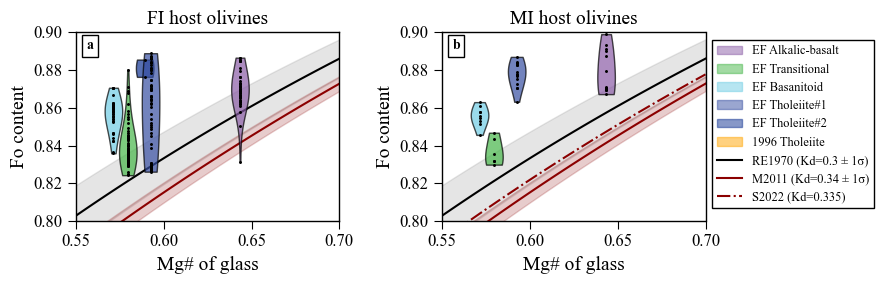

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(9,3))
bbox=dict(boxstyle='square', facecolor='white', edgecolor='black')


color_dict = {
    "KA71": '#8A5CA6',
    "KA69": '#46B649',
    "KA611": '#6FCDE4',
    "KA79": '#374FA2',
    "KA78": '#113393',
    "KA961": 'orange'

}

label_dict = {
    "KA71": "EF Alkalic-basalt",
    "KA69": "EF Transitional",
    "KA611": "EF Basanitoid",
    "KA79": "EF Tholeiite#1",
    "KA78": "EF Tholeiite#2",
    "KA961": "1996 Tholeiite"

}


## Panel a (FI only)

A_panel_df=Ols_4violins[Ols_4violins['Inclusion type']=='FI']

boxplot_data = []
labels = []
rocktypes = A_panel_df['Sample'].unique()

for i, rock_type in enumerate(rocktypes):
    rock_data = A_panel_df[A_panel_df['Sample'] == rock_type]
    MGnb_liq = rock_data.groupby('Mg#_liquid')['Fo_host'].median().sort_values().index
    labels.extend(MGnb_liq)
    boxplot_data.extend([rock_data[rock_data['Mg#_liquid'] == MG_nb]['Fo_host'].values for MG_nb in MGnb_liq])

violins1 = axs[0].violinplot(boxplot_data, showmeans=False, 
                             showextrema=False, showmedians=False, bw_method=1,positions=labels,widths=0.01)

for pc in violins1['bodies']:
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)


for i, rock_type in enumerate(rocktypes):
    rock_indices = A_panel_df[A_panel_df['Sample'] == rock_type]['Mg#_liquid']
    violin_indices = [labels.index(rock) for rock in rock_indices]
    for violin_index in violin_indices:
        violins1['bodies'][violin_index].set_facecolor(color_dict[rock_type])

axs[0].scatter(A_panel_df['Mg#_liquid'], A_panel_df['Fo_host'], marker='.',s=5,color='k')


## Panel b (MI only)

B_panel_df=Ols_4violins[Ols_4violins['Inclusion type']=='MI']

boxplot_data2 = []
labels2 = []
rocktypes2 = B_panel_df['Sample'].unique()

for i, rock_type in enumerate(rocktypes2):
    rock_data = B_panel_df[B_panel_df['Sample'] == rock_type]
    MGnb_liq = rock_data.groupby('Mg#_liquid')['Fo_host'].median().sort_values().index
    labels2.extend(MGnb_liq)
    boxplot_data2.extend([rock_data[rock_data['Mg#_liquid'] == MG_nb]['Fo_host'].values for MG_nb in MGnb_liq])

violins2 = axs[1].violinplot(boxplot_data2, showmeans=False, 
                             showextrema=False, showmedians=False, bw_method=1,positions=labels2,widths=0.01)

for pc in violins2['bodies']:
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)


for i, rock_type in enumerate(rocktypes2):
    rock_indices2 = A_panel_df[A_panel_df['Sample'] == rock_type]['Mg#_liquid']
    violin_indices2 = [labels2.index(rock) for rock in rock_indices2]
    for violin_index in violin_indices2:
        violins2['bodies'][violin_index].set_facecolor(color_dict[rock_type])

axs[1].scatter(B_panel_df['Mg#_liquid'], B_panel_df['Fo_host'], marker='.',s=5,color='k')

## Add the Rhodes lines to the plot ##

axs[0].plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Roeder (Kd=0.3)'], '-k',zorder=-1)

axs[0].fill_between(Rhodes['Mg#_Liq'],
                    Rhodes['Eq_Ol_Fo_Roeder (Kd=0.27)'], 
                    Rhodes['Eq_Ol_Fo_Roeder (Kd=0.33)'], 
                    color='grey', alpha=0.2, zorder=-2, label='Roeder 0.27-0.33')  # Adjust alpha for transparency

axs[0].plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Matzen (Kd=0.34)'], '-',color='darkred',zorder=-1)
axs[0].fill_between(Rhodes['Mg#_Liq'],
                    Rhodes['Eq_Ol_Fo_Matzen (Kd=0.328)'], 
                    Rhodes['Eq_Ol_Fo_Matzen (Kd=0.352)'], 
                    color='darkred', alpha=0.2, zorder=-2, label='Matzen 0.328 -0.352')  # Adjust alpha for transparency

axs[1].plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Roeder (Kd=0.3)'], '-k',zorder=-1)

axs[1].fill_between(Rhodes['Mg#_Liq'],
                    Rhodes['Eq_Ol_Fo_Roeder (Kd=0.27)'], 
                    Rhodes['Eq_Ol_Fo_Roeder (Kd=0.33)'], 
                    color='grey', alpha=0.2, zorder=-2, label='Roeder 0.27-0.33')  # Adjust alpha for transparency

axs[1].plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Matzen (Kd=0.34)'], '-',color='darkred',zorder=-1)
axs[1].fill_between(Rhodes['Mg#_Liq'],
                    Rhodes['Eq_Ol_Fo_Matzen (Kd=0.328)'], 
                    Rhodes['Eq_Ol_Fo_Matzen (Kd=0.352)'], 
                    color='darkred', alpha=0.2, zorder=-2, label='Matzen 0.328 -0.352')  # Adjust alpha for transparency

axs[1].plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Shea (Kd=0.325)'], '-.',color='darkred',zorder=-1)

## Now let's construct the legend items and plot the legend

line_handle_1 = mlines.Line2D([], [], color='black', linestyle='-')
line_handle_2 = mlines.Line2D([], [], color='darkred', linestyle='-')
line_handle_3 = mlines.Line2D([], [], color='darkred', linestyle='-.')

legend_handles = []
legend_labels = []

for rock_type, color in color_dict.items():
    legend_handles.append(mpatches.Patch(color=color, alpha=0.5, label=rock_type))
    legend_labels.append(rock_type)

legend_handles.extend([line_handle_1, line_handle_2,line_handle_3])
legend_labels_updated = [label_dict.get(code, 'Unknown') for code in legend_labels]
legend_labels_updated.extend(['RE1970 (Kd=0.3 ± 1σ)', 'M2011 (Kd=0.34 ± 1σ)','S2022 (Kd=0.335)'])

axs[1].legend(handles=legend_handles, labels=legend_labels_updated, 
              loc='upper left', framealpha=1, edgecolor='black', fontsize=9, 
              ncol=1, bbox_to_anchor=(1, 0.99))


# Additional modifications
###### This part is common to both plots #####

pos=(0.04,0.91)

axs[0].text(pos[0], pos[1], 'a', transform=axs[0].transAxes, fontsize=10, fontweight='bold', bbox=bbox)
axs[1].text(pos[0], pos[1], 'b', transform=axs[1].transAxes, fontsize=10, fontweight='bold', bbox=bbox)

axs[0].set_ylabel('Fo content')
axs[1].set_ylabel('Fo content')

axs[0].set_xlabel('Mg# of glass')
axs[1].set_xlabel('Mg# of glass')

axs[0].set_ylim([0.80,0.90])
axs[0].set_xlim([0.55,0.70])
axs[1].set_ylim([0.80,0.90])
axs[1].set_xlim([0.55,0.70])

axs[0].set_title('FI host olivines')
axs[1].set_title('MI host olivines')

fig.tight_layout()

fig.savefig(figpath+slash+'Rhodes_ol_matglass.pdf', format='pdf', dpi=300, transparent=True)

## Now let's plot Rhodes diagrams for clinopyroxenes and matrix glasses

In [12]:
## First, use thermobar to calculate Mg# of crystals and glass

cpx_liqs=pt.import_excel(compilation_folder+'/'+r"cpxs_liqs_thermobar.xlsx",
                         sheet_name='Sheet1')
all=cpx_liqs['my_input'] 
MG_Liqs=cpx_liqs['Liqs'] 
Cpxs=cpx_liqs['Cpxs']
MG_Liqs.head()

Liq_Mgno_calc=pt.calculate_liq_mgno(liq_comps=MG_Liqs, Fe3Fet_Liq=0.2)
Liq_Mgno_calc.head()

MG_Liqs['Mg#_liquid']=Liq_Mgno_calc.copy()

Ol_Fo_Calc=pt.calculate_cpx_mgno(cpx_comps=Cpxs)
Cpxs['Fo_host']=Ol_Fo_Calc.copy()

## Then separate MI and FI (cpx were only FI though)

MI_host_MG_Liqs=MG_Liqs[MG_Liqs['Sample_ID_Liq'].str.contains("c2")]
MI_host_Cpxs=Cpxs[Cpxs['Sample_ID_Cpx'].str.contains("c2")]
FI_host_MG_Liqs=MG_Liqs[~MG_Liqs['Sample_ID_Liq'].str.contains("c2")]
FI_host_Cpxs=Cpxs[~Cpxs['Sample_ID_Cpx'].str.contains("c2")]

## Merge the liquids and crystals for plotting as violins
Cpxs_4violins=pd.merge(left=Cpxs,right=MG_Liqs,left_on='Sample_ID_Cpx', right_on='Sample_ID_Liq',how='left')

Cpxs_4violins['Sample'] = [sample.split("_")[0] for sample in Cpxs_4violins['Sample_ID_Liq']]
Cpxs_4violins['Inclusion type'] = ['MI' if '_c2' in sample else 'FI' for sample in Cpxs_4violins['Sample_ID_Liq']]

Cpxs_4violins

,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,...,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq,Mg#_liquid,Sample,Inclusion type
0,46.053650,2.826700,7.313200,7.789100,0.133500,12.450500,22.059700,0.0,0.0,0.0000,...,0.219400,0.0,0.0,0.0,0.0,0.0,KA611_c110,0.571372,KA611,FI
1,51.783633,0.722467,3.150333,5.673767,0.141333,16.642667,20.431067,0.0,0.0,0.8335,...,0.178639,0.0,0.0,0.0,0.0,0.0,KA69_c334,0.579561,KA69,FI
2,51.495000,1.105000,4.590000,5.760000,0.085000,15.845000,21.750000,0.0,0.0,0.7900,...,0.178639,0.0,0.0,0.0,0.0,0.0,KA69_c403,0.579561,KA69,FI


### Calculate the Rhodes lines 

In [13]:
Rhodes=pt.calculate_cpx_rhodes_diagram_lines(Min_Mgno=0.5, Max_Mgno=0.7) # This is putirka eq 35
Rhodes.head()

,Mg#_Liq,Eq_Cpx_Mg# (Kd=0.28),Eq_Cpx_Mg# (Kd=0.2),Eq_Cpx_Mg# (Kd=0.36)
0,0.500000,0.781250,0.833333,0.735294
1,0.502020,0.782628,0.834453,0.736864
2,0.504040,0.783999,0.835566,0.738428
3,0.506061,0.785365,0.836673,0.739986
4,0.508081,0.786724,0.837775,0.741538


### Now plot the violins for clinopyroxene-matrix glasses

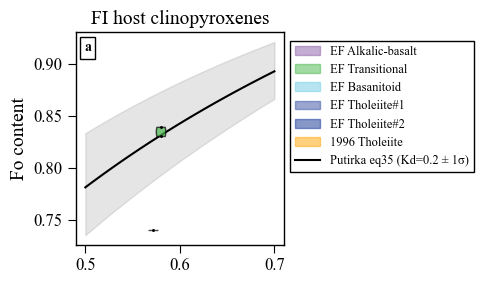

In [15]:
fig, axs = plt.subplots(1, 1, figsize=(5,3))
bbox=dict(boxstyle='square', facecolor='white', edgecolor='black')

color_dict = {
    "KA71": '#8A5CA6',
    "KA69": '#46B649',
    "KA611": '#6FCDE4',
    "KA79": '#374FA2',
    "KA78": '#113393',
    "KA961": 'orange'

}

label_dict = {
    "KA71": "EF Alkalic-basalt",
    "KA69": "EF Transitional",
    "KA611": "EF Basanitoid",
    "KA79": "EF Tholeiite#1",
    "KA78": "EF Tholeiite#2",
    "KA961": "1996 Tholeiite"

}


## Panel a (FI only)

A_panel_df=Cpxs_4violins[Cpxs_4violins['Inclusion type']=='FI']

boxplot_data = []
labels = []
rocktypes = A_panel_df['Sample'].unique()

for i, rock_type in enumerate(rocktypes):
    rock_data = A_panel_df[A_panel_df['Sample'] == rock_type]
    MGnb_liq = rock_data.groupby('Mg#_liquid')['Fo_host'].median().sort_values().index
    labels.extend(MGnb_liq)
    boxplot_data.extend([rock_data[rock_data['Mg#_liquid'] == MG_nb]['Fo_host'].values for MG_nb in MGnb_liq])

violins1 = axs.violinplot(boxplot_data, showmeans=False, 
                             showextrema=False, showmedians=False, bw_method=1,positions=labels,widths=0.01)

for pc in violins1['bodies']:
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)


for i, rock_type in enumerate(rocktypes):
    rock_indices = A_panel_df[A_panel_df['Sample'] == rock_type]['Mg#_liquid']
    violin_indices = [labels.index(rock) for rock in rock_indices]
    for violin_index in violin_indices:
        violins1['bodies'][violin_index].set_facecolor(color_dict[rock_type])

axs.scatter(A_panel_df['Mg#_liquid'], A_panel_df['Fo_host'], marker='.',s=5,color='k')

## Add the Rhodes lines to the plot ##

axs.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Cpx_Mg# (Kd=0.28)'], '-k',zorder=-1)

axs.fill_between(Rhodes['Mg#_Liq'],
                    Rhodes['Eq_Cpx_Mg# (Kd=0.2)'], 
                    Rhodes['Eq_Cpx_Mg# (Kd=0.36)'], 
                    color='grey', alpha=0.2, zorder=-2)  # Adjust alpha for transparency

## Now let's construct the legend items and plot the legend

line_handle_1 = mlines.Line2D([], [], color='black', linestyle='-')

legend_handles = []
legend_labels = []

for rock_type, color in color_dict.items():
    legend_handles.append(mpatches.Patch(color=color, alpha=0.5, label=rock_type))
    legend_labels.append(rock_type)

legend_handles.extend([line_handle_1])
legend_labels_updated = [label_dict.get(code, 'Unknown') for code in legend_labels]
legend_labels_updated.extend(['Putirka eq35 (Kd=0.2 ± 1σ)'])

axs.legend(handles=legend_handles, labels=legend_labels_updated, 
              loc='upper left', framealpha=1, edgecolor='black', fontsize=9, 
              ncol=1, bbox_to_anchor=(1, 0.99))


# Additional modifications
###### This part is common to both plots #####

pos=(0.04,0.91)

axs.text(pos[0], pos[1], 'a', transform=axs.transAxes, fontsize=10, fontweight='bold', bbox=bbox)

axs.set_ylabel('Fo content')


# axs[0].set_ylim([0.80,0.90])
# axs[0].set_xlim([0.55,0.70])


axs.set_title('FI host clinopyroxenes')


fig.tight_layout()

fig.savefig(figpath+slash+'Rhodes_cpx_matglass.pdf', format='pdf', dpi=300, transparent=True)